# Mandelbrot set dynamics evaluation with Python

This examples exploits `PyMandelbrot` package to draw a picture of the Mandelbrot set.

## Introduction

The Mandelbrot set is extensively described at this [Wiki page](https://en.wikipedia.org/wiki/Mandelbrot_set).

It is the set of points `c` in the complex plane for which the function `f(z) = z^2 + c` does not diverge to infinity, when iterated from `z = 0`.

It is known that the Mandelbrot set is bounded.  
The real part is contained indeed in the box `[-2, 0.47]`.  
The imaginary part, instead, is a subset of `[-1.12, 1.12]`.

In [1]:
# import statements
from PyMandelbrot import MandelbrotDynamics
import numpy as np

In [2]:
# load the grid points
x_ext = [-2.1, 0.6]
y_ext = [-1.13, 1.13]

x_pts = np.linspace(*x_ext, 1000)
y_pts = np.linspace(*y_ext, 1000)
cs = x_pts[None] + 1j * y_pts[:, None]
z0s = np.zeros_like(cs)

In [3]:
# instantiate the mandelbrot dynamics object
# store also the initial points and the offset parameters
dynamics = MandelbrotDynamics(z0s, cs)

# compute the divergency iteration for the stored grid of points
it = dynamics.get_divergency_iter()

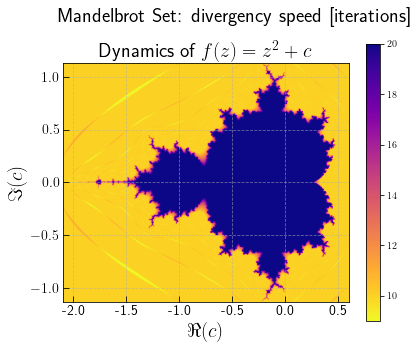

In [4]:
# visualize the mandelbrot set
import matplotlib.pyplot as plt

plt.rcParams.update({"text.usetex": True})
fig = plt.figure(figsize=(6.4, 5.1))
ax = fig.add_subplot()

ext = x_ext + y_ext
z = ax.imshow(it, origin="lower", extent=ext, cmap="plasma_r")
plt.colorbar(z)

# cosmetics
fig.suptitle("Mandelbrot Set: divergency speed [iterations]", fontsize=20)
ax.set_title(r"Dynamics of $f(z) = z^2 + c$", fontsize=20)
ax.set_xlabel(r"$\Re(c)$", fontsize=20)
ax.set_ylabel(r"$\Im(c)$", fontsize=20)
ax.tick_params(axis="x", which="major", labelsize=14, direction="in", size=6)
ticks = np.arange(-2, 1, 0.5)
labels = ticks.astype(str)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.tick_params(axis="y", which="major", labelsize=14, direction="in", size=6)
ax.grid(alpha=0.6, linestyle="dashed")


plt.show()